In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
!pip install emoji
!pip install nltk
import emoji
nltk.download('stopwords')
nltk.download('punkt')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 6.8 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Read file

In [ ]:
df = pd.read_csv('')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


# Drop column

In [ ]:
df.drop(columns = df.columns[0],inplace=True)

# Check missing value

In [ ]:
df.isnull().sum()

text     0
class    0
dtype: int64

# Check duplication

In [ ]:
df.duplicated().sum()

0

# Data Visualization

class
suicide        116037
non-suicide    116037
Name: count, dtype: int64


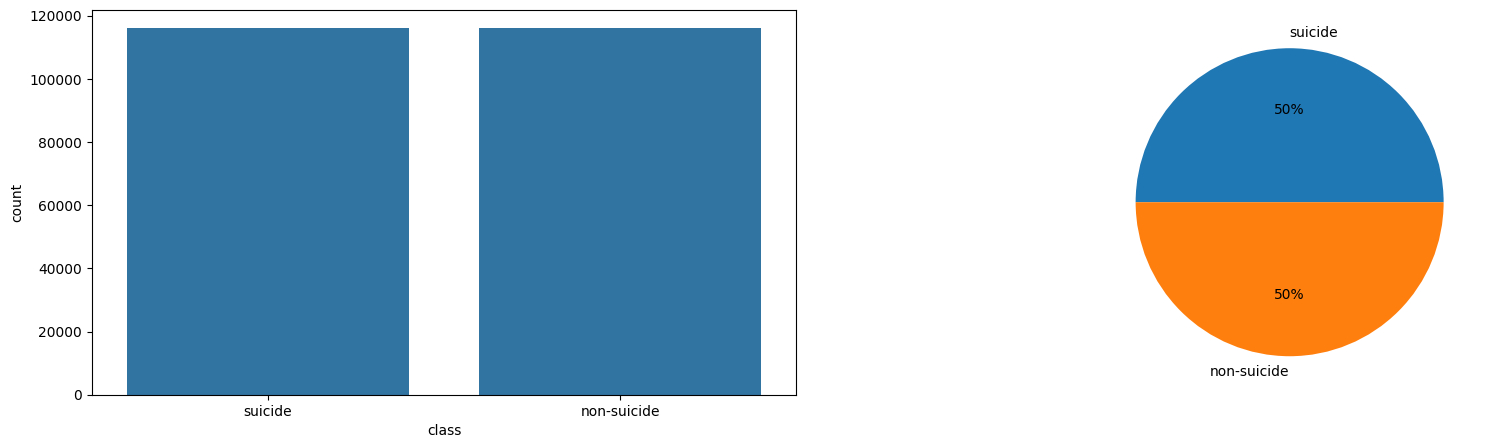

In [ ]:
classNum = df['class'].value_counts()
print(classNum)

plt.figure(figsize=((20,5)))

plt.subplot(1,2,1)
sns.countplot(df,x='class')

plt.subplot(1,2,2)
plt.pie(classNum,labels = classNum.index,autopct='%.0f%%')

plt.show()

# Data Preprocessing

In [ ]:
 #lowercase all sentences
df['text'] = df['text'].str.lower()
df

,text,class
0,ex wife threatening suiciderecently i left my ...,suicide
1,am i weird i don't get affected by compliments...,non-suicide
2,finally 2020 is almost over... so i can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"i’m so losthello, my name is adam (16) and i’v...",suicide
...,...,...
232069,if you don't like rock then your not going to ...,non-suicide
232070,you how you can tell i have so many friends an...,non-suicide
232071,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,the usual stuff you find herei'm not posting t...,suicide


In [ ]:
#convert emoji to text
df['text'] = df['text'].apply(emoji.demojize)  #hide and write in csv so that it wont run everytime
df

In [ ]:
# Remove Punctuation such as ‘!”#$%&'()*+,-./:;?@[]^_`{|}~’
df['text'] = df['text'].str.replace(r'[^\w\s]+', ' ',regex = True)
df

,Unnamed: 0,text,class
0,2,ex wife threatening suiciderecently i left my ...,suicide
1,3,am i weird i don t get affected by compliments...,non-suicide
2,4,finally 2020 is almost over so i can never he...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,i m so losthello my name is adam 16 and i v...,suicide
...,...,...,...
232069,348103,if you don t like rock then your not going to ...,non-suicide
232070,348106,you how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea smirking_fa...,non-suicide
232072,348108,the usual stuff you find herei m not posting t...,suicide


In [ ]:

from nltk.corpus import stopwords
#Stop word removal
stop_words = stopwords.words('english')
df['text'] = df['text'].apply(lambda x : ' '.join([word for word in x.split()
if word not in (stop_words)]))
df

,Unnamed: 0,text,class
0,2,ex wife threatening suiciderecently left wife ...,suicide
1,3,weird get affected compliments coming someone ...,non-suicide
2,4,finally 2020 almost never hear 2020 bad year e...,non-suicide
3,8,need helpjust help im crying hard,suicide
4,9,losthello name adam 16 struggling years afraid...,suicide
...,...,...,...
232069,348103,like rock going get anything go https musictas...,non-suicide
232070,348106,tell many friends lonely everything deprived p...,non-suicide
232071,348107,pee probably tastes like salty tea smirking_fa...,non-suicide
232072,348108,usual stuff find herei posting sympathy pity k...,suicide


In [ ]:
# tokenization
df['text'] = df['text'].fillna('')
df['text'] = df['text'].apply(lambda x: ' '.join([str(word) for word in x.split()]) if isinstance(x, str) else '')
df_dtype = df['text'].dtype
print(df_dtype)
df['text'] = df['text'].apply(lambda x:nltk.word_tokenize(x))
df

object


,Unnamed: 0,text,class
0,2,"[ex, wife, threatening, suiciderecently, left,...",suicide
1,3,"[weird, get, affected, compliments, coming, so...",non-suicide
2,4,"[finally, 2020, almost, never, hear, 2020, bad...",non-suicide
3,8,"[need, helpjust, help, im, crying, hard]",suicide
4,9,"[losthello, name, adam, 16, struggling, years,...",suicide
...,...,...,...
232069,348103,"[like, rock, going, get, anything, go, https, ...",non-suicide
232070,348106,"[tell, many, friends, lonely, everything, depr...",non-suicide
232071,348107,"[pee, probably, tastes, like, salty, tea, smir...",non-suicide
232072,348108,"[usual, stuff, find, herei, posting, sympathy,...",suicide


In [ ]:
df

,Unnamed: 0,text,class
0,2,"[ex, wife, threatening, suiciderecently, left,...",suicide
1,3,"[weird, get, affected, compliments, coming, so...",non-suicide
2,4,"[finally, 2020, almost, never, hear, 2020, bad...",non-suicide
3,8,"[need, helpjust, help, im, crying, hard]",suicide
4,9,"[losthello, name, adam, 16, struggling, years,...",suicide
...,...,...,...
232069,348103,"[like, rock, going, get, anything, go, https, ...",non-suicide
232070,348106,"[tell, many, friends, lonely, everything, depr...",non-suicide
232071,348107,"[pee, probably, tastes, like, salty, tea, smir...",non-suicide
232072,348108,"[usual, stuff, find, herei, posting, sympathy,...",suicide


In [ ]:
#stemming
ps = PorterStemmer()
df['text'] = df['text'].apply(lambda x : [ps.stem(i) for i in x])
df['text']=df['text'].apply(lambda x : ' '.join(x))
df

,Unnamed: 0,text,class
0,2,ex wife threaten suiciderec left wife good che...,suicide
1,3,weird get affect compliment come someon know i...,non-suicide
2,4,final 2020 almost never hear 2020 bad year eve...,non-suicide
3,8,need helpjust help im cri hard,suicide
4,9,losthello name adam 16 struggl year afraid pas...,suicide
...,...,...,...
232069,348103,like rock go get anyth go http musictast space...,non-suicide
232070,348106,tell mani friend lone everyth depriv pre bough...,non-suicide
232071,348107,pee probabl tast like salti tea smirking_fac s...,non-suicide
232072,348108,usual stuff find herei post sympathi piti know...,suicide


In [ ]:
df

,Unnamed: 0,text,class
0,2,ex wife threaten suiciderec left wife good che...,suicide
1,3,weird get affect compliment come someon know i...,non-suicide
2,4,final 2020 almost never hear 2020 bad year eve...,non-suicide
3,8,need helpjust help im cri hard,suicide
4,9,losthello name adam 16 struggl year afraid pas...,suicide
...,...,...,...
232069,348103,like rock go get anyth go http musictast space...,non-suicide
232070,348106,tell mani friend lone everyth depriv pre bough...,non-suicide
232071,348107,pee probabl tast like salti tea smirking_fac s...,non-suicide
232072,348108,usual stuff find herei post sympathi piti know...,suicide


# Start Modelling

In [2]:
dfnew = pd.read_csv('/content/donePreprocessData.csv')


In [3]:
ind = dfnew[dfnew['text'].isnull()].index
dfnew.dropna(inplace=True)


In [4]:
# testing

# Split the dataset into training and testing sets first
X_train, X_test, y_train, y_test = train_test_split(dfnew['text'], dfnew['class'], test_size=0.2, random_state=42)

# Initialize a TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', min_df=50,max_features=10000)

# Fit the vectorizer on the training data only and transform it
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Perform the label encoding after splitting the data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)


# Logistic Regerssion

Training score: 93.98%
Testing score: 93.50%

              precision    recall  f1-score   support

 non-suicide       0.93      0.94      0.94     23051
     suicide       0.94      0.93      0.93     23358

    accuracy                           0.93     46409
   macro avg       0.94      0.94      0.93     46409
weighted avg       0.94      0.93      0.93     46409


Confusion Matrix for Train Data:
 [[88157  4809]
 [ 6363 86305]]

Confusion Matrix for Test Data:
 [[21778  1273]
 [ 1745 21613]]


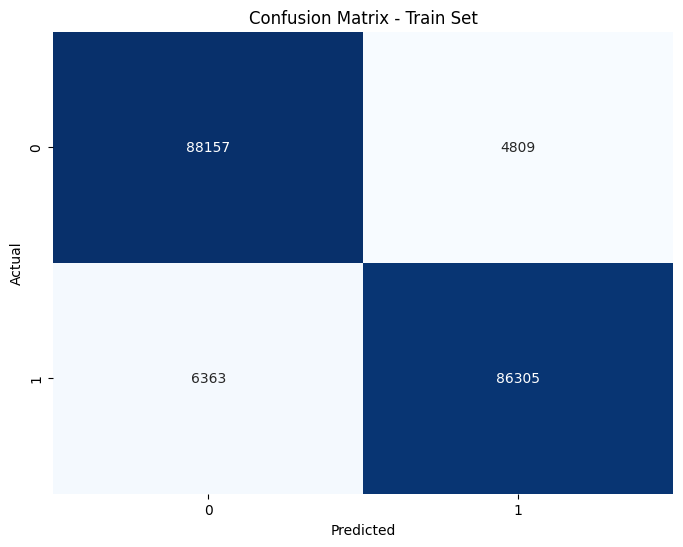

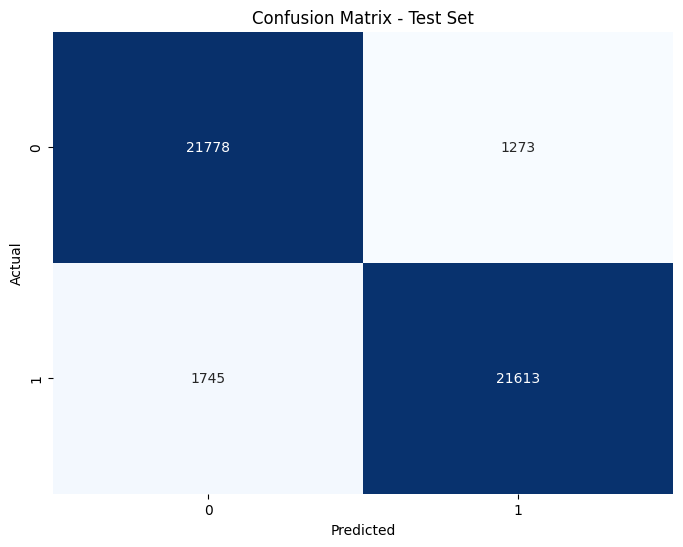

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000)
# Fit the logistic regression model on the training data
logreg.fit(X_train_tfidf, y_train_encoded)

# Predictions on the training data
train_pred = logreg.predict(X_train_tfidf)
# Predictions on the test data
test_pred = logreg.predict(X_test_tfidf)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate the accuracy on the training set and test set
train_accuracy = accuracy_score(y_train_encoded, train_pred)
test_accuracy = accuracy_score(y_test_encoded, test_pred)

print("Training score: {:.2f}%".format(train_accuracy*100))
print("Testing score: {:.2f}%\n".format(test_accuracy*100))

from sklearn.metrics import classification_report
# Additional: Classification report for more insights
target_names = encoder.classes_
print(classification_report(y_test_encoded, test_pred,target_names=target_names))

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix for training data
train_conf_matrix = confusion_matrix(y_train_encoded, train_pred)
print("\nConfusion Matrix for Train Data:\n",train_conf_matrix)

# Confusion matrix for testing data
test_conf_matrix = confusion_matrix(y_test_encoded, test_pred)
print("\nConfusion Matrix for Test Data:\n",test_conf_matrix)

# Define function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for train set
plot_confusion_matrix(train_conf_matrix, title="Confusion Matrix - Train Set")

# Plot confusion matrix for test set
plot_confusion_matrix(test_conf_matrix, title="Confusion Matrix - Test Set")

# Logistic Regresion Tuning

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation score: 0.94
Test accuracy with best parameters: 0.935723674287315

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     23051
           1       0.94      0.93      0.94     23358

    accuracy                           0.94     46409
   macro avg       0.94      0.94      0.94     46409
weighted avg       0.94      0.94      0.94     46409



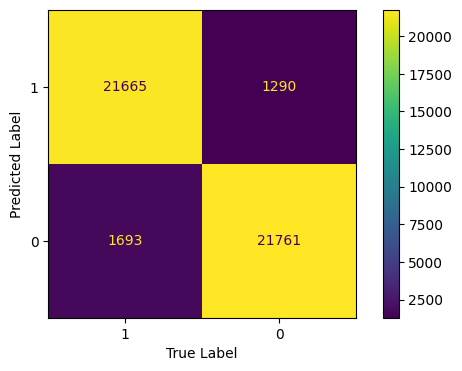

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'penalty': ['l1','l2'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']
}

# Initialize logistic regression model
logreg = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_tfidf, y_train_encoded)


# Best Parameters and Score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Using the best model found on the test data
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test_tfidf)

test_accuracy = accuracy_score(y_test_encoded, test_predictions)
print("Test accuracy with best parameters:", test_accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_encoded, test_predictions))

# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_encoded, test_predictions)
fig, ax = plt.subplots(1,1,figsize=(7,4))

ConfusionMatrixDisplay(confusion_matrix(test_predictions,y_test_encoded,labels=[1,0]),
                       display_labels=[1,0]).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()


# MultiNomial Naive Bayes

Training score: 0.9038915284915479
Testing score: 0.9020017668986618
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     23051
           1       0.87      0.95      0.91     23358

    accuracy                           0.90     46409
   macro avg       0.91      0.90      0.90     46409
weighted avg       0.90      0.90      0.90     46409


Confusion Matrix for Train Data:
 [[80098 12868]
 [ 4973 87695]]

Confusion Matrix for Test Data:
 [[19783  3268]
 [ 1280 22078]]


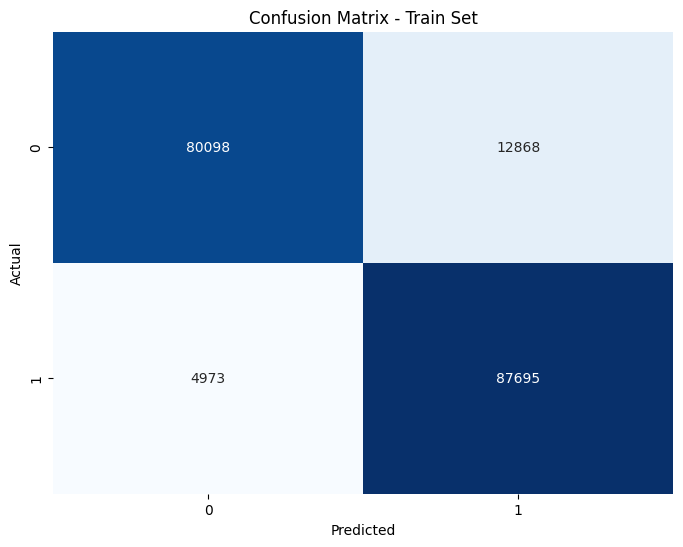

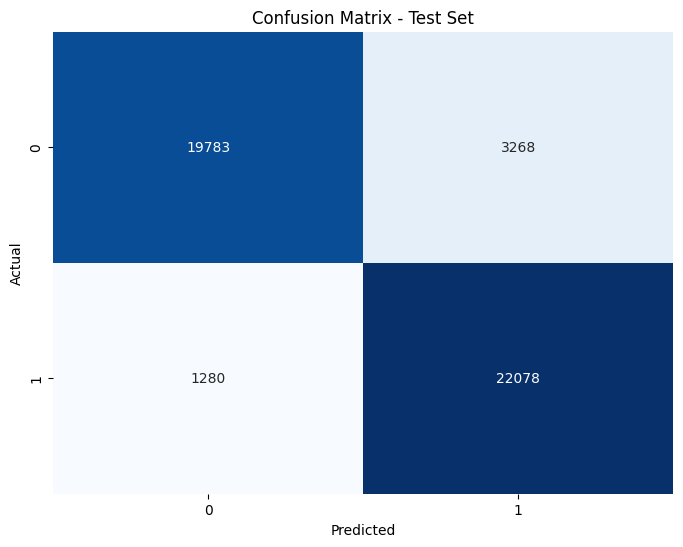

In [ ]:
# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Fit the model on the training data
nb_classifier.fit(X_train_tfidf, y_train_encoded)

# Predict on the training set and test set
train_predictions = nb_classifier.predict(X_train_tfidf)
test_predictions = nb_classifier.predict(X_test_tfidf)

# Calculate the accuracy on the training set and test set
train_accuracy = accuracy_score(y_train_encoded, train_predictions)
test_accuracy = accuracy_score(y_test_encoded, test_predictions)

print("Training score:", train_accuracy)
print("Testing score:", test_accuracy)

# Additional: Classification report for more insights
print(classification_report(y_test_encoded, test_predictions))

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix for training data
train_conf_matrix = confusion_matrix(y_train_encoded, train_predictions)
print("\nConfusion Matrix for Train Data:\n",train_conf_matrix)

# Confusion matrix for testing data
test_conf_matrix = confusion_matrix(y_test_encoded, test_predictions)
print("\nConfusion Matrix for Test Data:\n",test_conf_matrix)

# Define function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for train set
plot_confusion_matrix(train_conf_matrix, title="Confusion Matrix - Train Set")

# Plot confusion matrix for test set
plot_confusion_matrix(test_conf_matrix, title="Confusion Matrix - Test Set")


# MultiNomial Naive Bayes Tuning

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best parameters: {'alpha': 0.01, 'fit_prior': True}
Best cross-validation score: 0.90
Test accuracy with best parameters: 0.902389622702493

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     23051
           1       0.87      0.95      0.91     23358

    accuracy                           0.90     46409
   macro avg       0.91      0.90      0.90     46409
weighted avg       0.91      0.90      0.90     46409



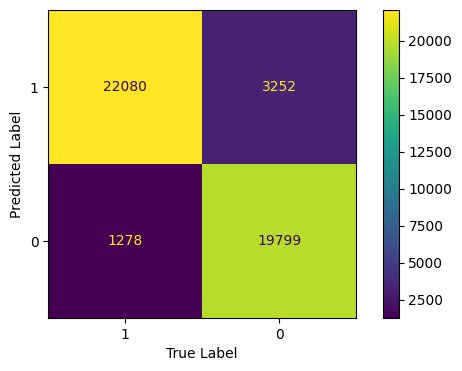

In [ ]:
# Parameters Grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10],
    'fit_prior': [True, False]
}

# Grid Search Initialization
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=10, scoring='accuracy', verbose=1)
grid_search.fit(X_train_tfidf, y_train_encoded)  # Assuming these variables are predefined

# Best Parameters and Score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Using the best model found on the test data
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test_encoded, test_predictions)
print("Test accuracy with best parameters:", test_accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_encoded, test_predictions))

# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_encoded, test_predictions)
fig, ax = plt.subplots(1,1,figsize=(7,4))

ConfusionMatrixDisplay(confusion_matrix(test_predictions,y_test_encoded,labels=[1,0]),
                       display_labels=[1,0]).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()


# Decision Tree

Training score: 99.92%
Testing score: 86.03%

              precision    recall  f1-score   support

 non-suicide       0.86      0.86      0.86     23051
     suicide       0.86      0.86      0.86     23358

    accuracy                           0.86     46409
   macro avg       0.86      0.86      0.86     46409
weighted avg       0.86      0.86      0.86     46409


Confusion Matrix for Train Data:
 [[92947    19]
 [  129 92539]]

Confusion Matrix for Test Data:
 [[19905  3146]
 [ 3339 20019]]


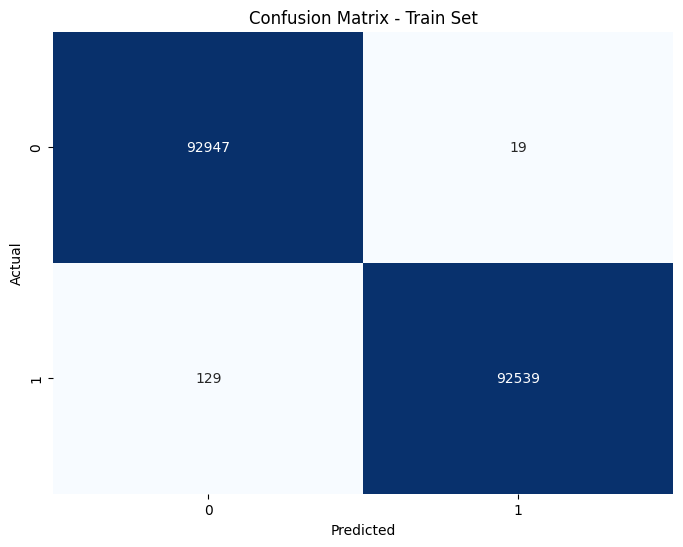

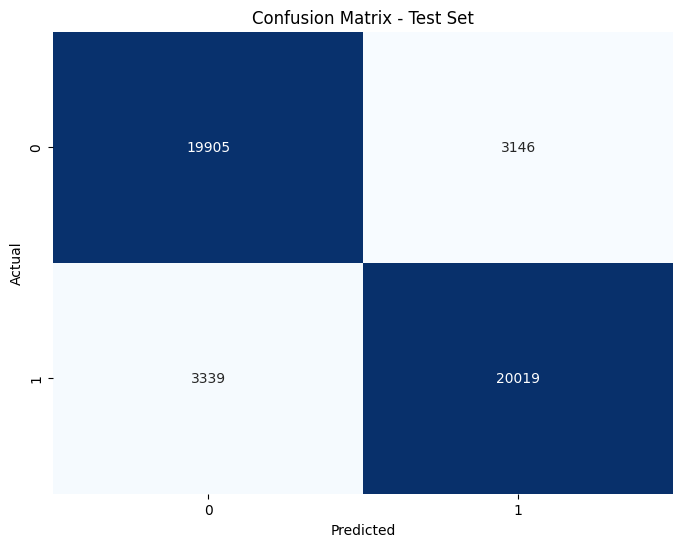

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize decision tree model
dtree = DecisionTreeClassifier()
# Fit the decision tree model on the training data
dtree.fit(X_train_tfidf, y_train_encoded)

# Predictions on the training data
train_predict = dtree.predict(X_train_tfidf)
# Predictions on the test data
test_predict = dtree.predict(X_test_tfidf)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate the accuracy on the training set and test set
train_accuracy = accuracy_score(y_train_encoded, train_predict)
test_accuracy = accuracy_score(y_test_encoded, test_predict)

print("Training score: {:.2f}%".format(train_accuracy * 100))
print("Testing score: {:.2f}%\n".format(test_accuracy * 100))


from sklearn.metrics import classification_report
# Calculate the accuracy on the training set and test set
target_names = encoder.classes_
print(classification_report(y_test_encoded, test_predict,target_names=target_names))

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix for training data
train_conf_matrix = confusion_matrix(y_train_encoded, train_predict)
print("\nConfusion Matrix for Train Data:\n", train_conf_matrix)

# Confusion matrix for testing data
test_conf_matrix = confusion_matrix(y_test_encoded, test_predict)
print("\nConfusion Matrix for Test Data:\n", test_conf_matrix)

# Define function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for train set
plot_confusion_matrix(train_conf_matrix, title="Confusion Matrix - Train Set")

# Plot confusion matrix for test set
plot_confusion_matrix(test_conf_matrix, title="Confusion Matrix - Test Set")


# Decision Tree Tuning

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize Decision Tree classifier
dt = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_tfidf, y_train_encoded)

# Best Parameters and Score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Using the best model found on the test data
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test_tfidf)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validation score: 0.86


Test accuracy with best parameters: 0.8614237288135593

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      7368
           1       0.89      0.82      0.86      7382

    accuracy                           0.86     14750
   macro avg       0.86      0.86      0.86     14750
weighted avg       0.86      0.86      0.86     14750



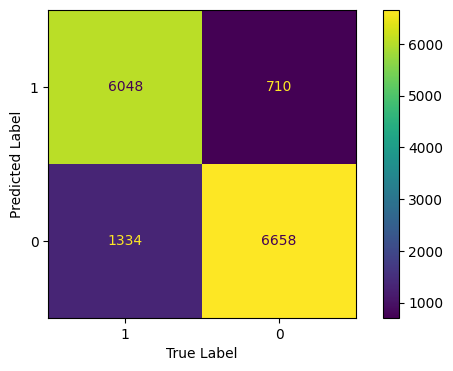

In [8]:
test_accuracy = accuracy_score(y_test_encoded, test_predictions)
print("Test accuracy with best parameters:", test_accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_encoded, test_predictions))

# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_encoded, test_predictions)
fig, ax = plt.subplots(1,1,figsize=(7,4))

ConfusionMatrixDisplay(confusion_matrix(test_predictions,y_test_encoded,labels=[1,0]),
                       display_labels=[1,0]).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()